<a href="https://colab.research.google.com/github/Harini-sakthivel/wordcloud/blob/master/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wordcloud


In [0]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS



In [0]:
def google_authenticate():
  #authenticate first
  from google.colab import auth
  auth.authenticate_user()
  
  from googleapiclient.discovery import build
  drive_service=build('drive','v3')
  return drive_service



In [0]:
drive_service=google_authenticate()

  

In [0]:
def read_file(file_id):
  """
  doenload file from drive
  argument: file_id
  returns:download file
  """
  file_id=file_id
  
  import io
  
  from googleapiclient.http import MediaIoBaseDownload
  
  request=drive_service.files().get_media(fileId=file_id)
  downloaded=io.BytesIO()
  downloader=MediaIoBaseDownload(downloaded,request)
  done = False
  while done is False:
    #_is a placeholder for a progress object that we ignore.
    # (Our file is small,so we skip reporting progress.)
    _, done=downloader.next_chunk()
    
    
  downloaded.seek(0)
  return downloaded
  #print 'downloaded file contents are:',downloaded.read()
  
  
  

In [0]:
text_file = read_file('0B1o0My0PL3p5clNZelZyTmgzREJ5LUExWjNxWkVJLWFnc3VV')
  

In [65]:
document = text_file.read().decode()
print(len(document))
print(document[0:100])
  
 

145
﻿Arise Awake and stop not till the goal is reached wings of fire ignited minds world of opportunitie


(-0.5, 399.5, 199.5, -0.5)

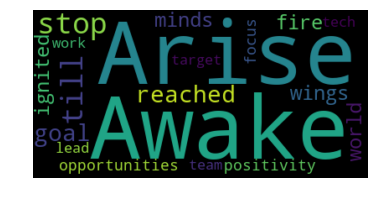

In [66]:
wordcloud = WordCloud().generate(document)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



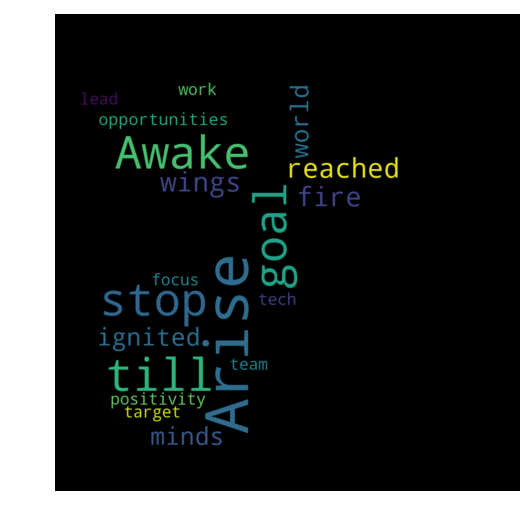

In [67]:
image_file = read_file('0B1o0My0PL3p5YVhBX1JsVzBIYThWWTFwQ0xlRjg3ZjRsajU4')

# create mask
alice_mask = np.array(Image.open(image_file))

# remove stopwords
stopwords = set(STOPWORDS)
stopwords.add("said")

# generate word cloud
wc = WordCloud(background_color="black", max_words=50, mask=alice_mask,
               stopwords=stopwords)
wc.generate(document)

# plot the word cloud
plt.figure(figsize=(6,8), dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()